# Data Processing

In [ ]:
import numpy as np
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  x_train.shape
num_classes = len(np.unique(y_train))

In [32]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [33]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"

In [34]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 3, 32, 32)
(50000, 1)
(10000, 3, 32, 32)
(10000, 1)


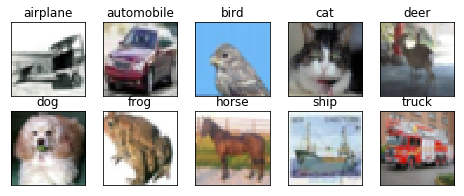

In [36]:
import matplotlib.pyplot as plt
% matplotlib inline

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (1, 2, 0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [37]:
from keras.utils import np_utils

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Define CNN Model

In [40]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout


# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(3, 32, 32)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(3, 32, 32..., padding="same")`
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: U

# Model Optimization & Fitting

In [41]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 48, 32, 32)        1344      
_________________________________________________________________
activation_25 (Activation)   (None, 48, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 48, 30, 30)        20784     
_________________________________________________________________
activation_26 (Activation)   (None, 48, 30, 30)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 15, 15)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 48, 15, 15)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 96, 15, 15)        41568     
__________

In [ ]:
# Train the model
import time 

start = time.time()
model_info = model.fit(x_train,y_train,batch_size=128,nb_epoch=200,
          validation_data = (x_test, y_test), 
          verbose=0)
end = time.time()

duration_1 = end - start
print(duration_1)

accuracy = accuracy(x_test, y_test, model)
print(accuracy)



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.2,horizontal_flip=True)


start = time.time()
model_info = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 128),
                                 samples_per_epoch = x_train.shape[0], nb_epoch = 200, 
                                 validation_data = (x_test, y_test), verbose=0)
end = time.time()

duration_2 = end - start
print(duration_1)

accuracy = accuracy(x_test, y_test, model)
print(accuracy)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., verbose=0, steps_per_epoch=390, epochs=200)`
  # This is added back by InteractiveShellApp.init_path()
